In [0]:
# Load basic library
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist

Note: PCA need standar scaler all feature (include time)

In [0]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX =StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

In [0]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [0]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

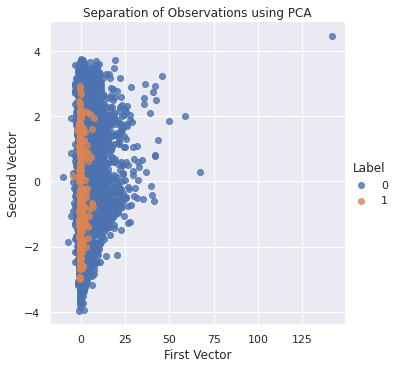

In [0]:
n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

# AnomalyScores PCA

In [0]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
#preds = plotResults(y_train, anomalyScoresPCA, True)

## Evaluate on Train set

### ROC

In [0]:
precision, recall, thresholds = precision_recall_curve(y_train,anomalyScoresPCA)
average_precision = average_precision_score(y_train,anomalyScoresPCA)

fpr, tpr, thresholds = roc_curve(y_train,anomalyScoresPCA)
areaUnderROC = auc(fpr, tpr)

(971,)
Best Threshold=0.004357, G-Mean=0.896


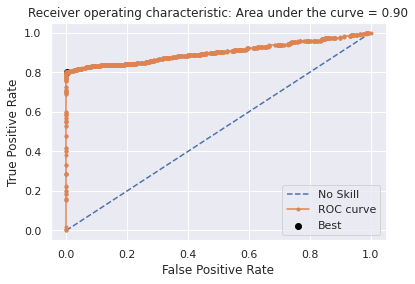

In [0]:
fpr, tpr, thresholds = roc_curve(y_train,anomalyScoresPCA)
areaUnderROC = auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
# show the plot
plt.show()

In [0]:
best_threshold=best_threshold_1
print('best_threshold',best_threshold)
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

best_threshold 0.004356967817384251
accuracy_score: 
 0.9983701918037942
confusion_matrix 
 [[190244    246]
 [    65    265]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.52      0.80      0.63       330

    accuracy                           1.00    190820
   macro avg       0.76      0.90      0.81    190820
weighted avg       1.00      1.00      1.00    190820



### Precision recall curve

Best Threshold=0.033701, F-Score=0.799


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.69')

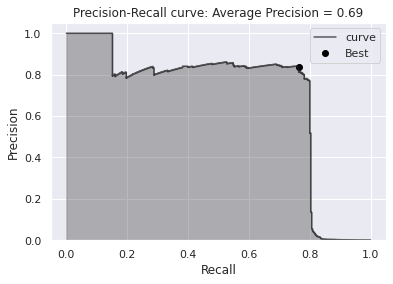

In [0]:
precision, recall, thresholds = precision_recall_curve(y_train,anomalyScoresPCA)
average_precision = average_precision_score(y_train,anomalyScoresPCA)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

# plot the roc curve for the model
#no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
#plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
best_threshold=best_threshold_2
print('best_threshold',best_threshold)
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

best_threshold 0.03370124824633056
accuracy_score: 
 0.9993344513153758
confusion_matrix 
 [[190441     49]
 [    78    252]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.84      0.76      0.80       330

    accuracy                           1.00    190820
   macro avg       0.92      0.88      0.90    190820
weighted avg       1.00      1.00      1.00    190820



## Evaluate on Test set

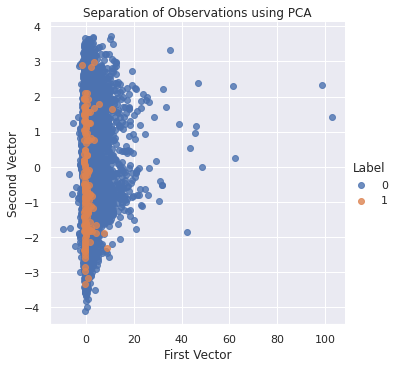

In [0]:
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)
scatterPlot(X_test_PCA, y_test, "PCA")

How to know threshold if evaluate by PCA ?

In [0]:
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
#preds = plotResults(y_test, anomalyScoresPCA, True)

In [0]:
#best_threshold=0.5
best_threshold=best_threshold_2

In [0]:
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9992658559162437
confusion_matrix 
 [[93791    34]
 [   35   127]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.79      0.78      0.79       162

    accuracy                           1.00     93987
   macro avg       0.89      0.89      0.89     93987
weighted avg       1.00      1.00      1.00     93987



# Follow Kaggle Dealing with Imbalanced Dataset

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

# NOTE: THIS method use different data transform (not scale time series) than part 3,4

In [0]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df=data.copy()

(0.0, 172792.0)

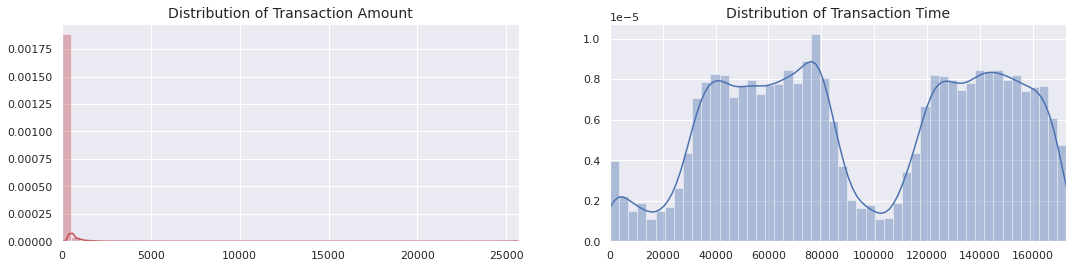

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [0]:
featuresToScale=['Time','Amount']
rob_scaler = RobustScaler()
df.loc[:,featuresToScale] = rob_scaler.fit_transform(df[featuresToScale])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.927124,0.001727
std,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


## Splitting the Data (Original DataFrame)

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [0]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, 
                                    random_state=2018, stratify=dataY)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [0]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.001729245759178389
0.0017204452090867595


Undersampling method

In [0]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
amount_fraud_classs=df.loc[df['Class'] == 1].shape[0]
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:amount_fraud_classs]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()

(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194864,0.541571,2.018576,-0.354020,-1.795093,0.019683,0.620680,0.162580,0.041133,0.001354,0.496574,0.223080,-0.244157,0.329121,-0.648250,0.525378,-0.711160,0.317889,-0.808213,0.092514,0.905036,-0.112489,-0.256511,-0.773032,0.144126,-0.355806,-0.103973,0.287221,-0.096906,-0.071237,0.355341,0
10801,-0.778827,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,-13.670545,10.545263,-15.022700,0.171633,-15.066374,-0.259576,-8.668739,-12.804141,-5.116620,0.579200,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,-0.293440,1
22534,-0.615573,-0.363108,1.149144,1.433851,0.137717,-0.120945,-1.169168,0.724030,-0.099567,-0.431940,-0.514431,0.096858,0.080144,0.157477,-0.429068,0.859297,0.282696,0.121573,-0.257217,-0.214559,0.108196,-0.241533,-0.621142,0.023018,0.663107,-0.201086,0.051352,0.246900,0.101765,-0.269825,0
73857,-0.345176,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,-8.122161,6.029033,-9.225855,-1.546759,-10.309334,0.308062,-7.787326,-12.822177,-4.367677,2.643984,-0.289830,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,-0.295815,1
249828,0.821285,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,-3.447596,-4.707571,4.905820,-5.208374,0.532498,-10.544011,-1.307419,-2.133593,-5.133081,-1.062151,-0.819371,0.558425,0.329760,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,-0.213233,1


In [0]:
new_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

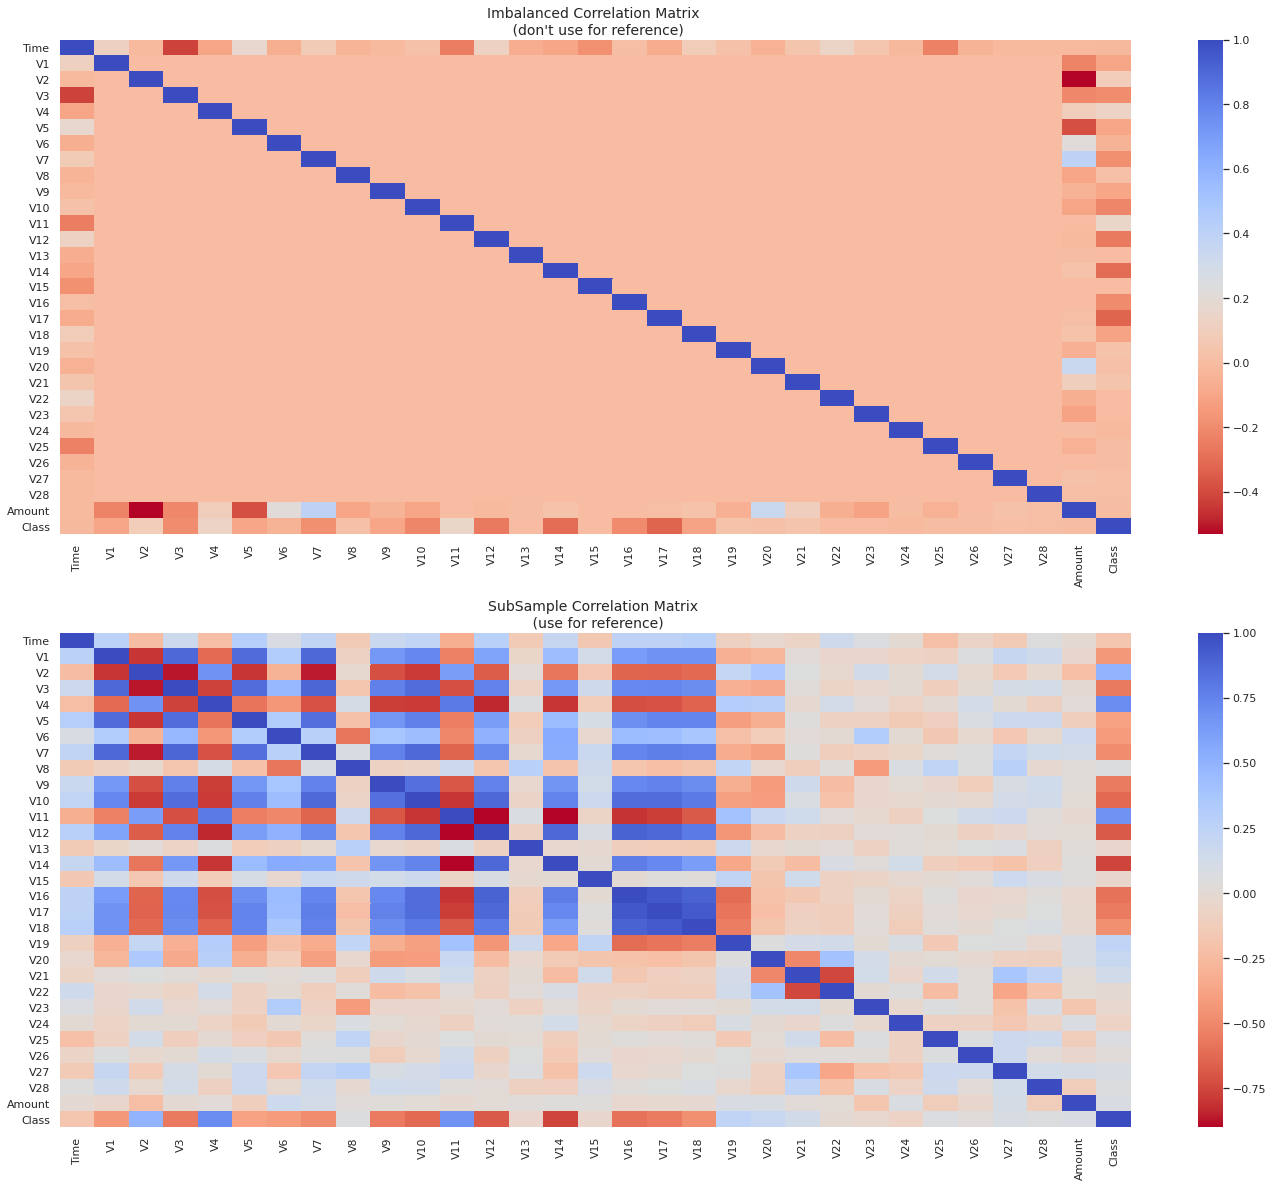

In [0]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [0]:
new_df.corr().sort_values(by='Class',ascending='False')['Class']

V14      -0.752080
V12      -0.678329
V10      -0.627380
V16      -0.592448
V3       -0.563251
V17      -0.556051
V9       -0.555447
V7       -0.478913
V18      -0.470520
V1       -0.429268
V6       -0.415627
V5       -0.386564
Time     -0.174467
V24      -0.070431
V13      -0.044238
V15      -0.035009
V23      -0.024270
V22      -0.005087
V26       0.024399
V28       0.059834
V8        0.064794
V25       0.069774
Amount    0.084352
V27       0.094494
V21       0.136518
V20       0.196461
V19       0.237183
V2        0.500771
V11       0.687709
V4        0.710931
Class     1.000000
Name: Class, dtype: float64

Correlation Matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

Summary and Explanation:

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

In [0]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194864,0.541571,2.018576,-0.354020,-1.795093,0.019683,0.620680,0.162580,0.041133,0.001354,0.496574,0.223080,-0.244157,0.329121,-0.648250,0.525378,-0.711160,0.317889,-0.808213,0.092514,0.905036,-0.112489,-0.256511,-0.773032,0.144126,-0.355806,-0.103973,0.287221,-0.096906,-0.071237,0.355341,0
10801,-0.778827,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,-13.670545,10.545263,-15.022700,0.171633,-15.066374,-0.259576,-8.668739,-12.804141,-5.116620,0.579200,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,-0.293440,1
22534,-0.615573,-0.363108,1.149144,1.433851,0.137717,-0.120945,-1.169168,0.724030,-0.099567,-0.431940,-0.514431,0.096858,0.080144,0.157477,-0.429068,0.859297,0.282696,0.121573,-0.257217,-0.214559,0.108196,-0.241533,-0.621142,0.023018,0.663107,-0.201086,0.051352,0.246900,0.101765,-0.269825,0
73857,-0.345176,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,-8.122161,6.029033,-9.225855,-1.546759,-10.309334,0.308062,-7.787326,-12.822177,-4.367677,2.643984,-0.289830,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,-0.295815,1
249828,0.821285,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,-3.447596,-4.707571,4.905820,-5.208374,0.532498,-10.544011,-1.307419,-2.133593,-5.133081,-1.062151,-0.819371,0.558425,0.329760,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,-0.213233,1


BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

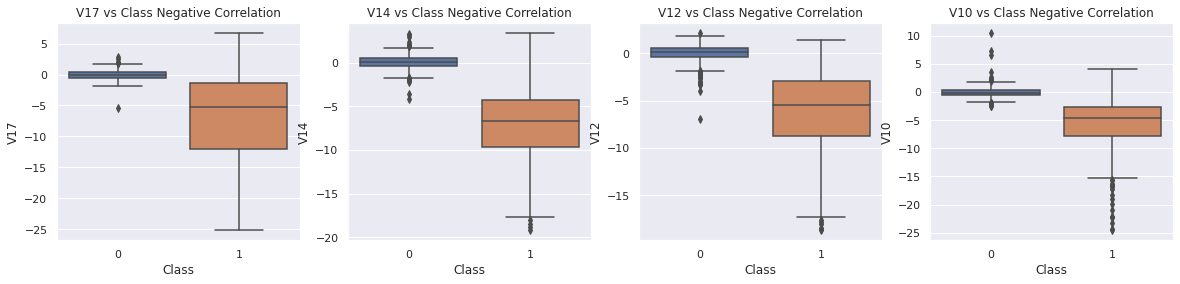

In [0]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df,  ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df,  ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df,  ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

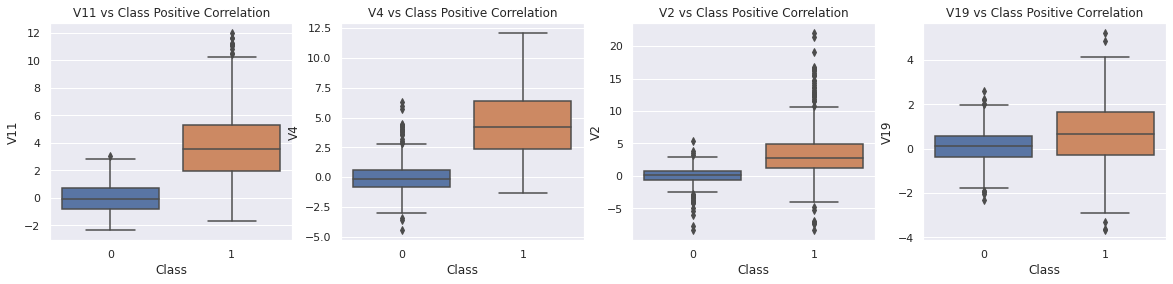

In [0]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df,  ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df,  ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df,  ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Anomaly Dectection: remove outliers

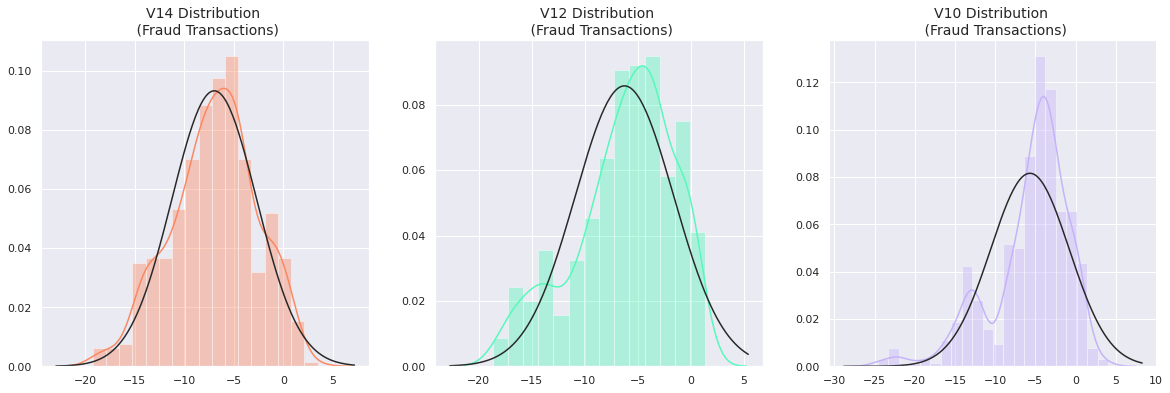

In [0]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

-----> V14 Removing Outliers (Highest Negative Correlated with Labels)

Remove outlier for V14, V12, V10

In [0]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.8220867423816, -18.4937733551053, -18.049997689859396, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.683714633344298, -18.553697009645802, -18.4311310279993, -18.047596570821604]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-16.7460441053944, -

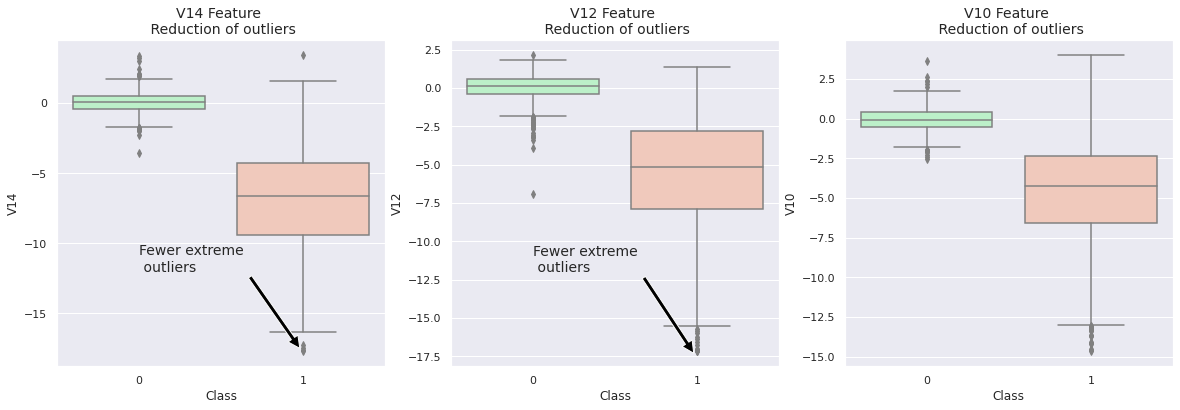

In [0]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Dimensionality Reduction and Clustering: (for reference)

In [0]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 7.5 s
PCA took 0.0058 s
Truncated SVD took 0.0078 s


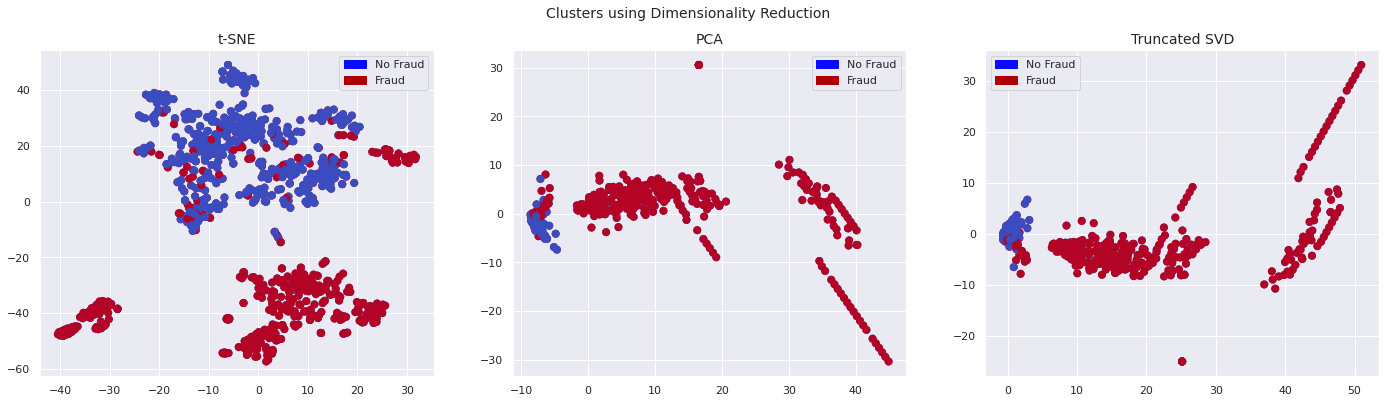

In [0]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Summary:

t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.

Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)

This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases

## Classifiers (follow by DNN)

### Spot check some model under sampling

In [0]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [0]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable #
    'NB':GaussianNB(),
    'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning #
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long) #
    'AB':AdaBoostClassifier(),  #Boosting #
    'GBM':GradientBoostingClassifier(), #Boosting #
    'ET':ExtraTreesClassifier(), #Bagging (very long) #
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    
}


In [0]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X, y, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


KNN
time : 0.359 

KNN: train_acc: 0.95 train_rec_macro: 0.95 train_prec_macro: 0.96   test_acc: 0.94 test_rec_macro: 0.94 test_prec_macro: 0.95   fit_time: 0.00
LR
time : 0.235 

LR: train_acc: 0.95 train_rec_macro: 0.95 train_prec_macro: 0.95   test_acc: 0.94 test_rec_macro: 0.94 test_prec_macro: 0.94   fit_time: 0.03
LDA
time : 0.134 

LDA: train_acc: 0.91 train_rec_macro: 0.91 train_prec_macro: 0.93   test_acc: 0.90 test_rec_macro: 0.90 test_prec_macro: 0.92   fit_time: 0.01
CART
time : 0.172 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.90 test_rec_macro: 0.90 test_prec_macro: 0.90   fit_time: 0.02
NB
time : 0.070 

NB: train_acc: 0.91 train_rec_macro: 0.91 train_prec_macro: 0.92   test_acc: 0.91 test_rec_macro: 0.91 test_prec_macro: 0.92   fit_time: 0.00
SVC
time : 0.192 

SVC: train_acc: 0.94 train_rec_macro: 0.94 train_prec_macro: 0.95   test_acc: 0.93 test_rec_macro: 0.93 test_prec_macro: 0.94   fit_time: 0.01
RF
time : 1.744 

RF: train_ac

In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
11,LGBM,0.943980,0.943980,0.947450,0.944805,1.000000,1.000000,1.000000,1.000000,0.455087,2.395716
1,LR,0.940896,0.940896,0.943784,0.941645,0.951083,0.951083,0.954648,0.951969,0.031414,0.234532
0,KNN,0.940192,0.940192,0.947352,0.941446,0.953269,0.953269,0.957952,0.954313,0.003773,0.359407
10,XGB,0.934640,0.934640,0.937193,0.935289,0.999180,0.999180,0.999235,0.999206,0.187028,1.012896
6,RF,0.934183,0.934183,0.939143,0.935166,1.000000,1.000000,1.000000,1.000000,0.311353,1.743513
9,ET,0.933870,0.933870,0.941057,0.935063,1.000000,1.000000,1.000000,1.000000,0.137476,0.876050
7,AB,0.929708,0.929708,0.930849,0.930070,0.995660,0.995660,0.995896,0.995766,0.228435,1.304266
8,GBM,0.929224,0.929224,0.932573,0.929931,0.999454,0.999454,0.999490,0.999471,0.717397,3.652838
5,SVC,0.928411,0.928411,0.936993,0.929659,0.939714,0.939714,0.948139,0.941146,0.014012,0.192303
4,NB,0.912647,0.912647,0.920062,0.913782,0.913347,0.913347,0.920641,0.914554,0.003147,0.070493


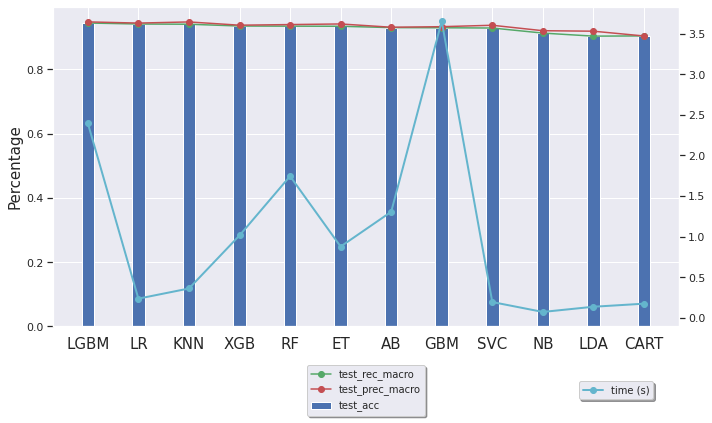

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

### Best model: LGBM

In [0]:
model=LGBMClassifier()
model.fit(X, y)
y_pred_1=model.predict(X_test)
y_pred_probs_1=model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_1[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_1[:,1])
areaUnderROC = auc(fpr, tpr)
print("average_precision",average_precision)
print('areaUnderROC',areaUnderROC)

average_precision 0.6811999624505061
areaUnderROC 0.9986640161129168


Use normal thresholds 0.5

In [0]:
confmat = confusion_matrix(y_test,y_pred_1)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_1))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_1))

accuracy_score: 
 0.9684175415189074
confusion_matrix 
 [[55065  1799]
 [    0    98]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      1.00      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.98      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Threshold by ROC curve

In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(1538,)
Best Threshold=0.979598, G-Mean=0.995


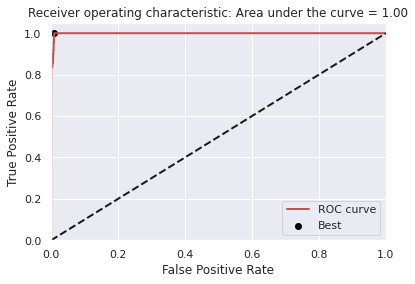

In [0]:
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in y_pred_probs_1[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9905551069133809
confusion_matrix 
 [[56326   538]
 [    0    98]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      1.00      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      1.00      0.63     56962
weighted avg       1.00      0.99      0.99     56962



Adjust threshold base on f1 score

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.999799, F-Score=0.745


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.68')

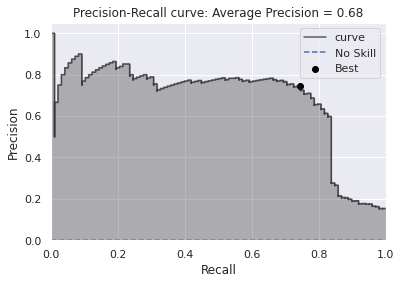

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs_1[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9991222218320986
confusion_matrix 
 [[56839    25]
 [   25    73]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.74      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Model: LR

In [0]:
model=LogisticRegression()
model.fit(X, y)
y_pred_1=model.predict(X_test)
y_pred_probs_1=model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_1[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_1[:,1])
areaUnderROC = auc(fpr, tpr)
print("average_precision",average_precision)
print('areaUnderROC',areaUnderROC)

average_precision 0.6710801729989887
areaUnderROC 0.9830064464587186


In [0]:
confmat = confusion_matrix(y_test,y_pred_1)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_1))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_1))

accuracy_score: 
 0.9673817632807837
confusion_matrix 
 [[55014  1850]
 [    8    90]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(183,)
Best Threshold=0.658104, G-Mean=0.948


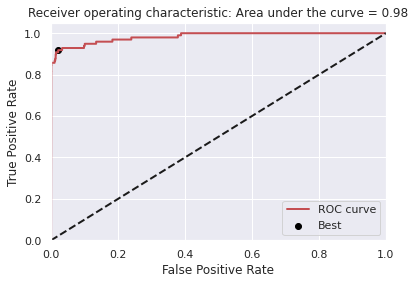

In [0]:
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in y_pred_probs_1[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('best_threshold_1',best_threshold_2)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

best_threshold_1 0.9997994999388483
accuracy_score: 
 0.9785997682665637
confusion_matrix 
 [[55653  1211]
 [    8    90]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.999352, F-Score=0.751


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.67')

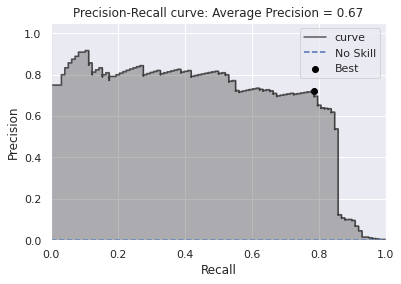

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs_1[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('best_threshold_2',best_threshold_2)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

best_threshold_2 0.9993515992788395
accuracy_score: 
 0.9991046662687406
confusion_matrix 
 [[56834    30]
 [   21    77]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.79      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



#### Grid search CV

In [0]:
X.shape

(946, 30)

In [0]:
# Logistic Regression 
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'solver' : ['liblinear'],
                  'penalty' : ['l1', 'l2']
                  }

grid_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_params,
                             scoring='f1',cv=5)
grid_log_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_1=log_reg.predict(X_test)
y_pred_probs_1=model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_1[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_1[:,1])
areaUnderROC = auc(fpr, tpr)
print("average_precision",average_precision)
print('areaUnderROC',areaUnderROC)

average_precision 0.6710801729989887
areaUnderROC 0.9830064464587186


In [0]:
confmat = confusion_matrix(y_test,y_pred_1)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_1))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_1))

accuracy_score: 
 0.9781082124925389
confusion_matrix 
 [[55625  1239]
 [    8    90]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Before tune and after tune : not change

## Classifier (follow by Kaggle)

In [0]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))
print(original_Xtrain.shape)
print(original_Xtest.shape)

Train: [ 47733  48187  48438 ... 284804 284805 284806] Test: [    0     1     2 ... 56980 56981 56982]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 47733  48187  48438 ... 113934 113935 113936]
Train: [     0      1      2 ... 284804 284805 284806] Test: [101373 102217 103177 ... 170890 170891 170892]
Train: [     0      1      2 ... 284804 284805 284806] Test: [165370 165523 168276 ... 227843 227844 227845]
Train: [     0      1      2 ... 227843 227844 227845] Test: [227846 227847 227848 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]
(227846, 30)
(56961, 30)


In [0]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']
print(X.shape)

(946, 30)


In [0]:
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [0]:
print(X_train.shape)

(756, 30)


In [0]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [0]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5,scoring='accuracy')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [0]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5,scoring='f1')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


### Grid search CV 

In [0]:

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimat

In [0]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.65%
Knears Neighbors Cross Validation Score 93.38%
Support Vector Classifier Cross Validation Score 93.12%
DecisionTree Classifier Cross Validation Score 92.85%


In [0]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94949,-0.230137,1.256450,0.407554,0.321350,0.686483,-0.305902,-1.055672,0.137326,-0.246021,-0.079786,-0.304533,0.060480,0.629302,0.967221,-0.434979,1.012625,0.443726,-0.047559,-0.390161,-0.203544,-0.032871,-0.278952,-0.769277,0.120307,0.365676,0.241083,0.091898,-0.018263,0.032451,-0.279746,0
254579,0.847167,0.367355,0.260837,-0.654678,-1.363962,-0.425389,-1.210414,0.072759,0.137705,-1.146788,0.149920,-1.107556,-0.839929,-0.402439,0.283120,-0.461327,0.612349,0.644970,-1.665378,0.966515,-0.135986,0.151817,0.299269,0.145448,-0.094377,-0.552817,-0.317553,-0.106581,-0.082280,-0.097813,0
198214,0.560298,1.976400,-0.417042,-1.150263,0.058406,-0.095262,-0.284501,-0.213995,0.059405,1.010375,-0.023478,0.588573,0.579559,-1.444403,0.541826,-0.754283,-0.295050,-0.235361,-0.064226,0.578740,-0.268556,-0.120425,-0.240850,0.254560,0.683560,-0.141686,-0.135810,-0.040408,-0.060033,-0.083840,0
174813,0.439244,-1.144035,-2.300369,0.616252,0.034990,1.428369,-1.108886,-0.505748,0.064883,0.595564,-0.050694,0.290088,0.298647,-0.342581,-0.040298,-0.185342,0.837445,-1.302137,1.014797,-0.401811,0.737647,0.506715,0.790631,0.730869,-0.422548,-0.674952,0.187321,-0.260576,-0.181820,2.186823,0
83186,-0.293331,-1.213545,-0.542754,0.804584,-1.751503,-1.349981,0.053086,1.716360,-0.277020,-1.688023,-0.010847,0.602950,-0.275996,-0.319343,0.220582,-0.400168,-0.674599,-0.713624,1.671702,-1.006091,-0.479139,-0.300484,-0.462768,0.285432,0.002675,0.090706,0.886881,0.002878,-0.010569,4.695032,0


### undersample during cross validating

In [0]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']
undersample_X.shape

(284807, 30)

In [0]:
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

Train: [ 47733  48187  48438 ... 284804 284805 284806] Test: [    0     1     2 ... 56980 56981 56982]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 47733  48187  48438 ... 113934 113935 113936]
Train: [     0      1      2 ... 284804 284805 284806] Test: [101373 102217 103177 ... 170890 170891 170892]
Train: [     0      1      2 ... 284804 284805 284806] Test: [165370 165523 168276 ... 227843 227844 227845]
Train: [     0      1      2 ... 227843 227844 227845] Test: [227846 227847 227848 ... 284804 284805 284806]


In [0]:
print(undersample_Xtrain.shape)
print(undersample_ytrain.shape)
print(undersample_Xtest.shape)
print(undersample_ytest.shape)

(227846, 30)
(227846,)
(56961, 30)
(56961,)


In [0]:
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('undersample_X',undersample_X.shape)
print('X_nearmiss',X_nearmiss.shape)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



undersample_X (284807, 30)
X_nearmiss (984, 30)
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [0]:
undersample_Xtrain.shape

(227846, 30)

In [0]:
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
  # SMOTE happens during Cross Validation not before..
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) 
    # udersampling and train ML on this sample (630)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    # use this model to predict original data set (182277)
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    #Score from LR model
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    #Precision score (y_test, y_prediction)
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

In [0]:
df_explain = pd.DataFrame(list(zip(undersample_accuracy, undersample_precision,
                                   undersample_recall,undersample_f1,undersample_auc)), 
               columns =['accuracy', 'precision','recall','f1','auc']) 
df_explain 

,accuracy,precision,recall,f1,auc
0,0.749045,0.006260,0.911392,0.012435,0.830078
1,0.812197,0.008349,0.923077,0.016548,0.867542
2,0.829029,0.009040,0.898734,0.017900,0.863821
3,0.847133,0.009543,0.848101,0.018873,0.847616
4,0.804845,0.008147,0.924051,0.016152,0.864345


Explain

In [0]:
print(undersample_Xtrain[train].shape)
print(undersample_Xtrain[test].shape)
print(undersample_ytrain[train].shape)
print(undersample_ytrain[test].shape)
print(undersample_prediction.shape)

(182277, 30)
(45569, 30)
(182277,)
(45569,)
(45569,)


In [0]:
print(original_Xtrain[test].shape)
print(original_ytrain[test].shape)

(45569, 30)
(45569,)


In [0]:
X_nearmiss2, y_nearmiss2 = NearMiss(sampling_strategy='majority').\
fit_sample(undersample_Xtrain[train],undersample_ytrain[train])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
Counter(undersample_ytrain[train])

Counter({0: 181962, 1: 315})

In [0]:
print(X_nearmiss2.shape)
print(y_nearmiss2.shape)

(630, 30)
(630,)


In [0]:
Counter(y_nearmiss2)

Counter({0: 315, 1: 315})

Continue

In [0]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt
    

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

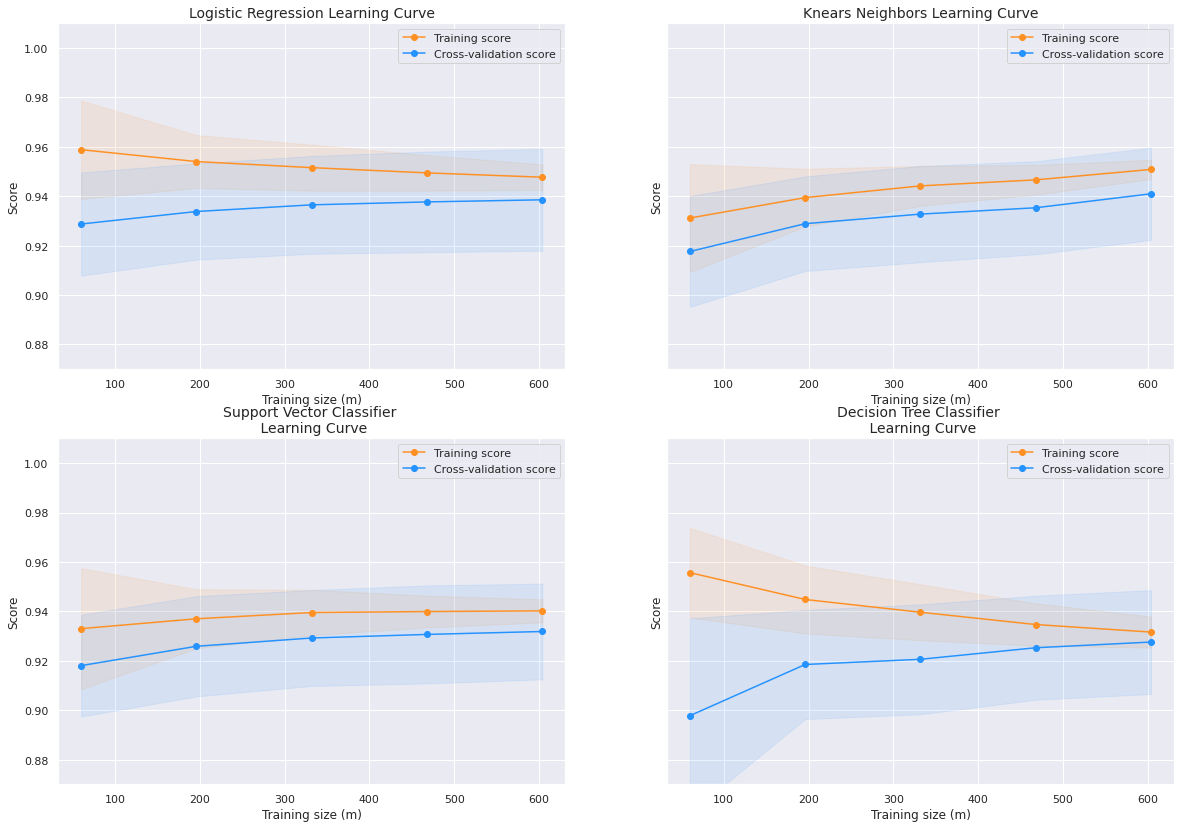

In [0]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [0]:
X_train.shape

(756, 30)

In [0]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [0]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))


Logistic Regression:  0.9729026192263706
KNears Neighbors:  0.9308953642569973
Support Vector Classifier:  0.9776807953803947
Decision Tree Classifier:  0.9255909572490054


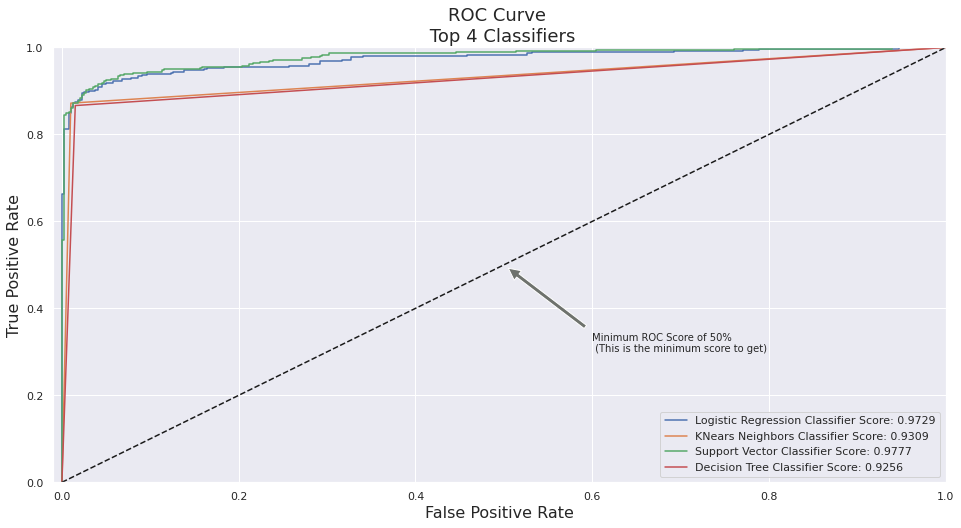

In [0]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


### Focus to Logistic Regression

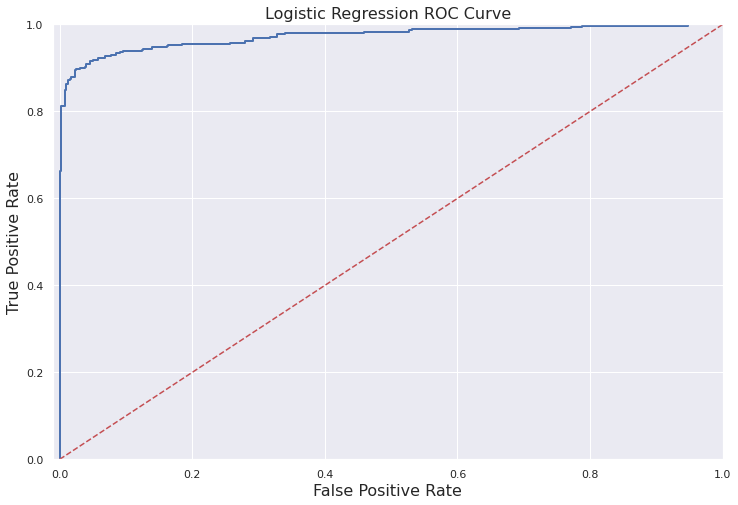

In [0]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [0]:
y_train.shape

(756,)

In [0]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting case (train and predict in undersample): \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be (train under sample and predict in full sample):\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting case (train and predict in undersample): 

Recall Score: 0.91
Precision Score: 0.81
F1 Score: 0.86
Accuracy Score: 0.86
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be (train under sample and predict in full sample):

Accuracy Score: 0.81
Precision Score: 0.01
Recall Score: 0.90
F1 Score: 0.02
---------------------------------------------------------------------------------------------------------------------------------------


In [0]:
undersample_y_score = log_reg.decision_function(original_Xtest)
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.11


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.11')

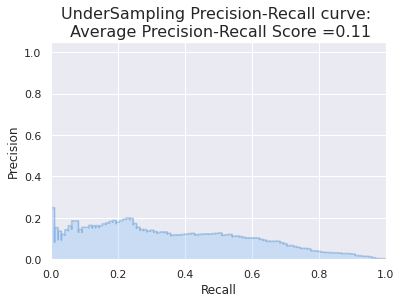

In [0]:
precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

### SMOTE

In [0]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [0]:
print(original_Xtrain[train].shape)
print( Counter(original_ytrain[train]))
sm=SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(original_Xtrain[train], original_ytrain[train])
print(y_res.shape)
print(Counter(y_res))

(182277, 30)
Counter({0: 181962, 1: 315})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(363924,)
Counter({0: 181962, 1: 181962})


In [0]:
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    #SMOTE sampling and fit model training 
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    #Model predict orginal data set
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst))) # 5 accuracy for 5 fold
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/pytho

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9725340760278105
precision: 0.053824156376314033
recall: 0.8959753326841934
f1: 0.10153101808980924
---------------------------------------------------------------------------------------------------------------------------------------


In [0]:
best_est

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56863
       Fraud       0.05      0.95      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.96      0.54     56961
weighted avg       1.00      0.97      0.98     56961



In [0]:
y_score = best_est.decision_function(original_Xtest)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(original_ytest, y_score)

Average precision-recall score: 0.67


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.67')

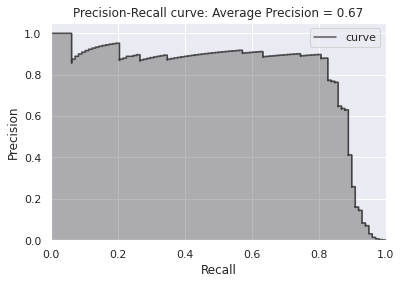

In [0]:
# plot the roc curve for the model
#no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
#plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
#plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
original_Xtrain.shape

(227846, 30)

In [0]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)
print(Xsm_train.shape)
print(Counter(ysm_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(454904, 30)
Counter({0: 227452, 1: 227452})


In [0]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.
import time
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :10.816298723220825 sec


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Test Data with Logistic Regression

In [0]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

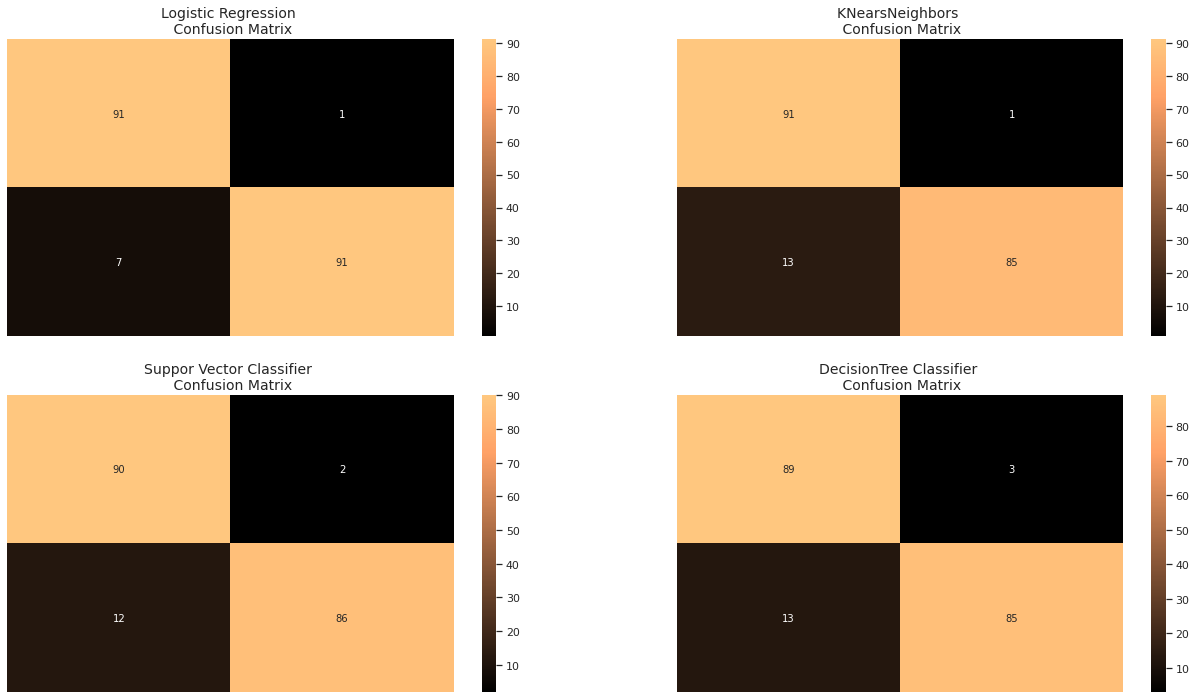

In [0]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))
sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [0]:
X_test.shape

(190, 30)

In [0]:
# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.957895
1,Oversampling (SMOTE),0.971682


In [0]:
print('classification_report Undersampling \n',classification_report(y_test, y_pred))
# not in original sample

classification_report Undersampling 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        92
           1       0.99      0.93      0.96        98

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



In [0]:
print('classification_report SMOTE \n',classification_report(original_ytest, y_pred_sm))
# in original sample

classification_report SMOTE 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.95      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.96      0.54     56961
weighted avg       1.00      0.97      0.98     56961



### Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):

In [0]:
X_train.shape

(756, 30)

In [0]:
n_inputs = X_train.shape[1]
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [0]:
undersample_model.compile(Adam(lr=0.001), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

In [0]:
undersample_model.fit(X_train, y_train, 
                      validation_split=0.2, 
                      batch_size=25, epochs=20, 
                      shuffle=True, verbose=2)

Train on 604 samples, validate on 152 samples
Epoch 1/20
 - 0s - loss: 0.9820 - accuracy: 0.6142 - val_loss: 0.3835 - val_accuracy: 0.8487
Epoch 2/20
 - 0s - loss: 0.3056 - accuracy: 0.8990 - val_loss: 0.2610 - val_accuracy: 0.9079
Epoch 3/20
 - 0s - loss: 0.2382 - accuracy: 0.9338 - val_loss: 0.2234 - val_accuracy: 0.9276
Epoch 4/20
 - 0s - loss: 0.2062 - accuracy: 0.9387 - val_loss: 0.1902 - val_accuracy: 0.9342
Epoch 5/20
 - 0s - loss: 0.1845 - accuracy: 0.9437 - val_loss: 0.1791 - val_accuracy: 0.9408
Epoch 6/20
 - 0s - loss: 0.1662 - accuracy: 0.9437 - val_loss: 0.1728 - val_accuracy: 0.9408
Epoch 7/20
 - 0s - loss: 0.1523 - accuracy: 0.9487 - val_loss: 0.1629 - val_accuracy: 0.9474
Epoch 8/20
 - 0s - loss: 0.1416 - accuracy: 0.9536 - val_loss: 0.1565 - val_accuracy: 0.9474
Epoch 9/20
 - 0s - loss: 0.1339 - accuracy: 0.9586 - val_loss: 0.1551 - val_accuracy: 0.9408
Epoch 10/20
 - 0s - loss: 0.1256 - accuracy: 0.9570 - val_loss: 0.1487 - val_accuracy: 0.9408
Epoch 11/20
 - 0s - los

In [0]:
original_Xtest.shape

(56961, 30)

In [0]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_predictions

array([[9.9998546e-01, 1.4513773e-05],
       [9.7990680e-01, 2.0093212e-02],
       [9.3010825e-01, 6.9891751e-02],
       ...,
       [8.8724762e-01, 1.1275235e-01],
       [9.0941644e-01, 9.0583533e-02],
       [9.9875057e-01, 1.2493903e-03]], dtype=float32)

In [0]:
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
confusion_matrix(original_ytest, undersample_fraud_predictions)

array([[54619,  2244],
       [    5,    93]])

In [0]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54619  2244]
 [    5    93]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


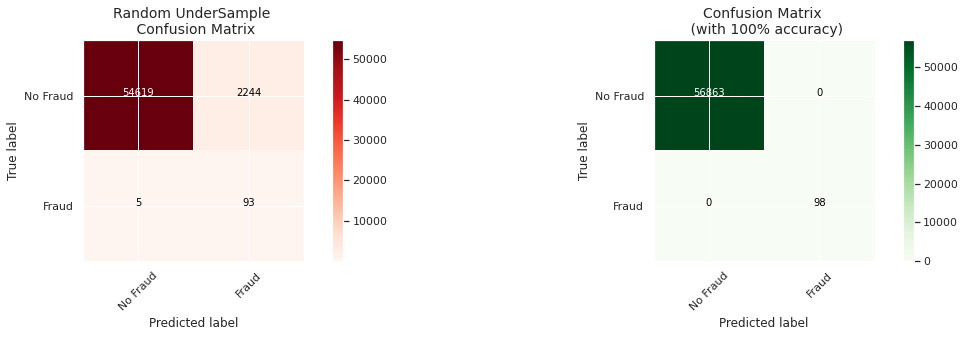

In [0]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [0]:
print('classification_report \n',classification_report(original_ytest, undersample_fraud_predictions))

classification_report 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.95      0.08        98

    accuracy                           0.96     56961
   macro avg       0.52      0.95      0.53     56961
weighted avg       1.00      0.96      0.98     56961



### Keras || OverSampling (SMOTE):

In [0]:
Xsm_train.shape

(454904, 30)

In [0]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 2s - loss: 0.0683 - accuracy: 0.9755 - val_loss: 0.0204 - val_accuracy: 0.9970
Epoch 2/20
 - 2s - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.0113 - val_accuracy: 0.9993
Epoch 3/20
 - 2s - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.0072 - val_accuracy: 0.9997
Epoch 4/20
 - 2s - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0030 - val_accuracy: 0.9998
Epoch 5/20
 - 2s - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/20
 - 2s - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/20
 - 2s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 8/20
 - 2s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 9/20
 - 2s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 10/20
 - 2s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 11/20
 - 2s 

In [0]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [0]:
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56818    45]
 [   14    84]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


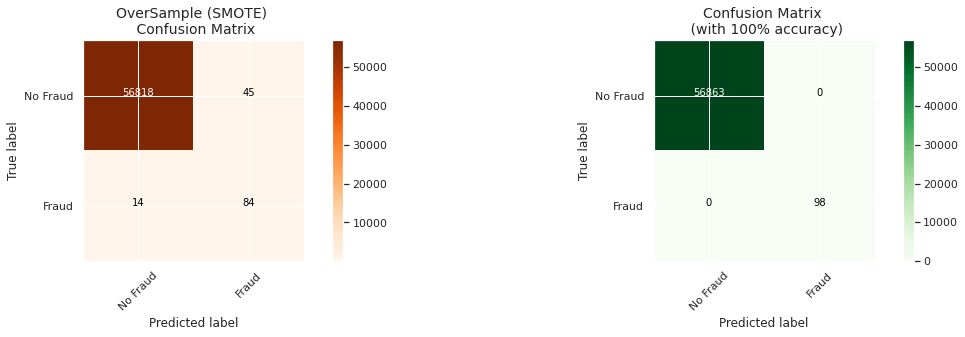

In [0]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [0]:
print('classification_report \n',classification_report(original_ytest, oversample_fraud_predictions))

classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.65      0.86      0.74        98

    accuracy                           1.00     56961
   macro avg       0.83      0.93      0.87     56961
weighted avg       1.00      1.00      1.00     56961

